# BASEBALL

Importing Libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

## Data Discription

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [2]:
import pandas as pd
df=pd.read_csv('baseball.csv')
df.sample(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
14,68,694,5600,1405,277,46,146,475,1119,78,729,664,4.14,5,15,28,126
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
20,90,683,5527,1351,295,17,177,488,1290,51,613,557,3.43,1,14,50,88
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77


explaing the features
- W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage) 
- R – Runs scored: times reached home plate legally and safely
- AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
- H – Hit: reaching base because of a batted, fair ball without error by the defense
- 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
- 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
- HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
- BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
- SO – Strikeout: number of batters who received strike three
- SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
- RA – Run average: number of runs allowed times nine divided by innings pitched
- ER – Earned run: number of runs that did not occur as a result of errors or passed balls
- ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
- CG – Complete game: number of games where player was the only pitcher for their team
- SHO – Shutout: number of complete games pitched with no runs allowed
- SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
- E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

updating the the feature names

In [3]:
#Renaming of columns for better understanding
df.rename(columns={'W':'Wins','R':'Runs','AB':'At_bat','H':'Hit','2B':'Double','3B':'Triple',
                  'HR':'Home_run','BB':'Walk','SO':'Strikeout','SB':'Stolen_base','RA':'Run_average',
                  'ER':'Earned_run','ERA':'Earned_run_avg','CG':'Complete_game','SHO':'Shutout','SV':'Save',
                  'E':'Error'}, 
                        inplace=True)

basic dicription of the data

In [5]:
#statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At_bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hit,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Double,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triple,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home_run,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Walk,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strikeout,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen_base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


checking the null value in dataset

In [6]:
df.isnull().sum()

Wins              0
Runs              0
At_bat            0
Hit               0
Double            0
Triple            0
Home_run          0
Walk              0
Strikeout         0
Stolen_base       0
Run_average       0
Earned_run        0
Earned_run_avg    0
Complete_game     0
Shutout           0
Save              0
Error             0
dtype: int64

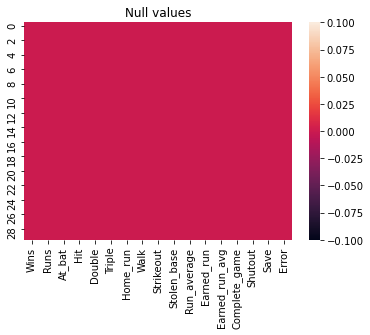

In [7]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

there isn't any null value present in the dataset

# checking corelation

In [8]:
df.corr()

,Wins,Runs,At_bat,Hit,Double,Triple,Home_run,Walk,Strikeout,Stolen_base,Run_average,Earned_run,Earned_run_avg,Complete_game,Shutout,Save,Error
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At_bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hit,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Double,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triple,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home_run,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walk,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeout,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen_base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


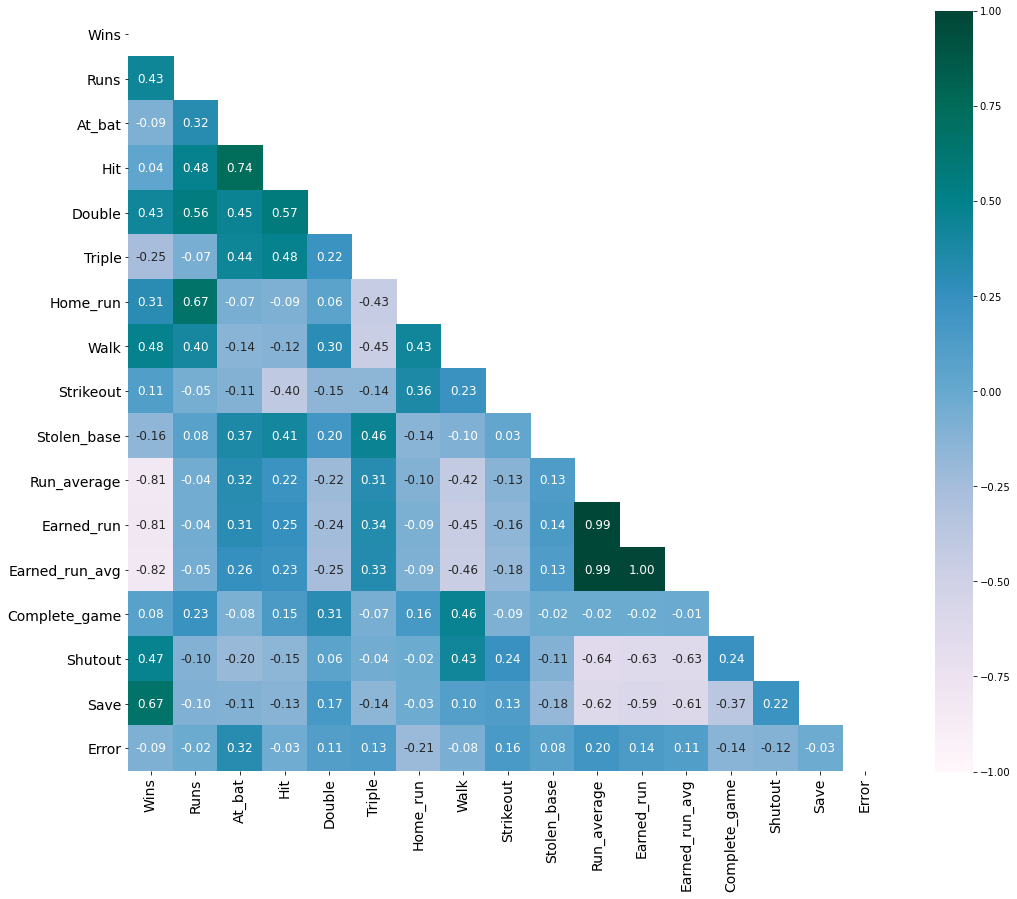

In [19]:
 upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,14))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.2f', 
            annot_kws={'size':12}, cmap="PuBuGn", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

By observing corelations:
- Runs_allowed, Earned_run and Earned_run_Avg are giving maximum relation with wins prediction, and it is also observed that these features are strongly corelated.
- We can drop column earned_runs and Runs_Allowed as it is in 100% correlation with Earned_Run_Avg.
- Features like Errors, complete_games and At_bats are least related to number of wins so we will drop these features also.
- Run_allowed, Earned_Run and Earned_Run_Avg these features are also in good correlation with shutout and save

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Wins            30 non-null     int64  
 1   Runs            30 non-null     int64  
 2   At_bat          30 non-null     int64  
 3   Hit             30 non-null     int64  
 4   Double          30 non-null     int64  
 5   Triple          30 non-null     int64  
 6   Home_run        30 non-null     int64  
 7   Walk            30 non-null     int64  
 8   Strikeout       30 non-null     int64  
 9   Stolen_base     30 non-null     int64  
 10  Run_average     30 non-null     int64  
 11  Earned_run      30 non-null     int64  
 12  Earned_run_avg  30 non-null     float64
 13  Complete_game   30 non-null     int64  
 14  Shutout         30 non-null     int64  
 15  Save            30 non-null     int64  
 16  Error           30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage

# Visualization

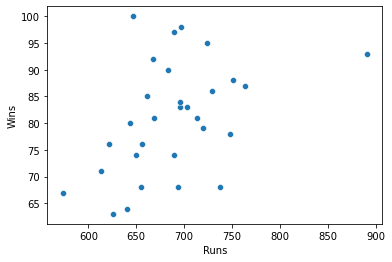

In [39]:
#Runs vs Wins
a=sns.scatterplot(x = 'Runs', y = 'Wins', data = df)
plt.show()

there is a high run of 900 with approx 95 wins

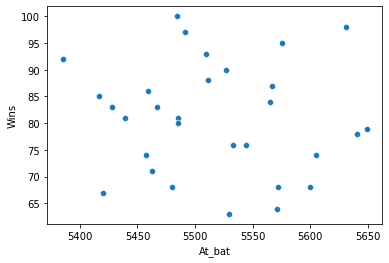

In [40]:
#At_bat vs Wins
b=sns.scatterplot(x = 'At_bat', y = 'Wins', data = df)
plt.show()

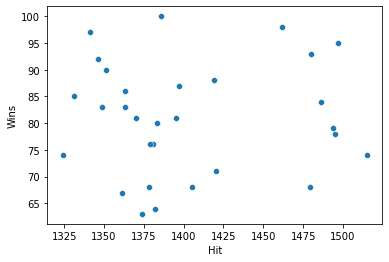

In [42]:
#hit vs wins
c=sns.scatterplot(x = 'Hit', y = 'Wins', data = df)
plt.show()

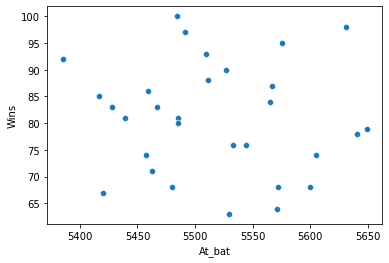

In [44]:
#at_bats vs Wins
d=sns.scatterplot(x = 'At_bat', y = 'Wins', data = df)
plt.show()

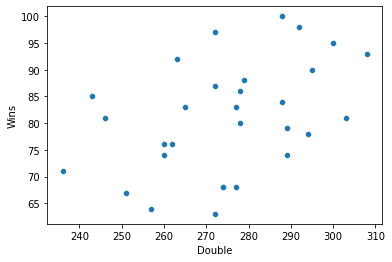

In [45]:
#number of wins based on number of doubles
sns.scatterplot(x = 'Double', y = 'Wins', data = df)
plt.show()

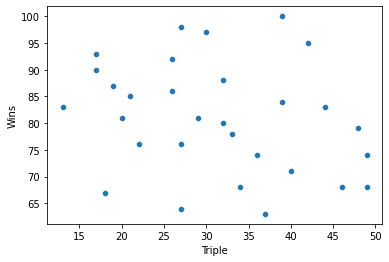

In [46]:
#Lets check impact of number of tripples on number of Wins
sns.scatterplot(x = 'Triple', y = 'Wins', data = df)
plt.show()

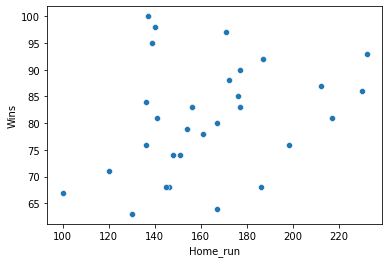

In [48]:
#Lets check impact of number of homeruns on number of Wins
sns.scatterplot(x = 'Home_run', y = 'Wins', data = df)
plt.show()

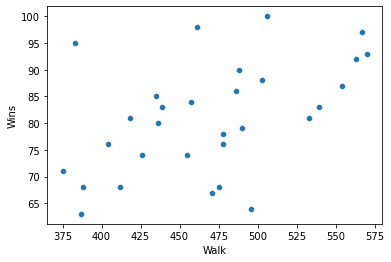

In [49]:
#Lets check impact of number of Walks on number of Wins
sns.scatterplot(x = 'Walk', y = 'Wins', data = df)
plt.show()

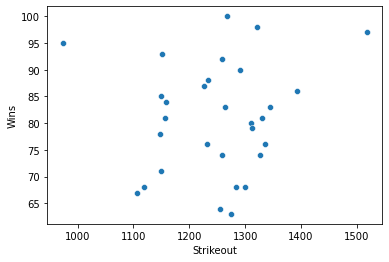

In [50]:
#Lets check impact of number of Strikeouts on number of Wins
sns.scatterplot(x = 'Strikeout', y = 'Wins', data = df)
plt.show()

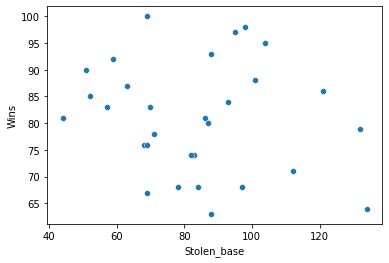

In [51]:
#Lets check impact of number of Stolen_Bases on number of Wins
sns.scatterplot(x = 'Stolen_base', y = 'Wins', data = df)
plt.show()

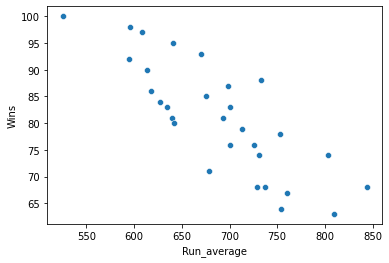

In [53]:
#Lets check impact of number of Runs_Allowed on number of Wins
sns.scatterplot(x = 'Run_average', y = 'Wins', data = df)
plt.show()

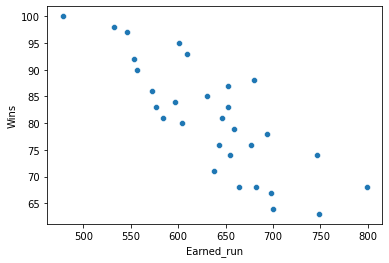

In [54]:
#Lets check impact of number of Earned_Runs on number of Wins
sns.scatterplot(x = 'Earned_run', y = 'Wins', data = df)
plt.show()

lowest run is 500 but highest wins is 100

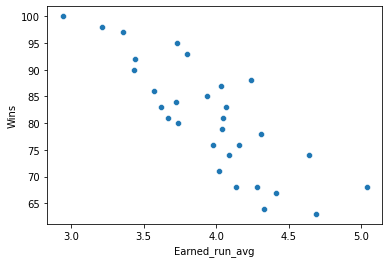

In [55]:
#Lets check impact of number of Earned_Run_Avg on number of Wins
sns.scatterplot(x = 'Earned_run_avg', y = 'Wins', data = df)
plt.show()

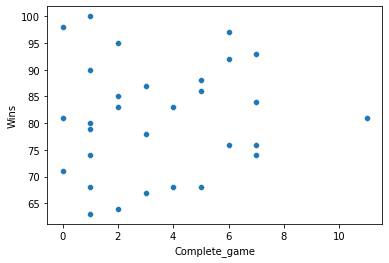

In [60]:
#Lets check impact of number of Complete_Games on number of Wins
sns.scatterplot(x = 'Complete_game', y = 'Wins', data = df)
plt.show()

only one time more that 10 completed the game wirh approx 83 wins

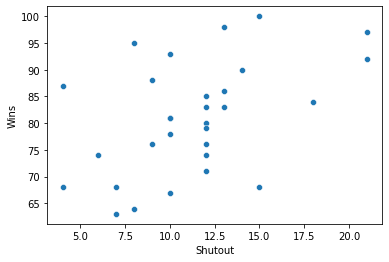

In [58]:
#Lets check impact of number of Shutouts on number of Wins
sns.scatterplot(x = 'Shutout', y = 'Wins', data = df)
plt.show()

there are multiple 12 shoutout  with wins from 70 to 85

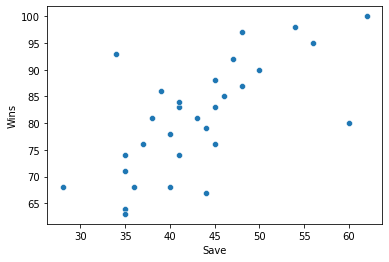

In [57]:
#Lets check impact of number of Saves on number of Wins
sns.scatterplot(x = 'Save', y = 'Wins', data = df)
plt.show()

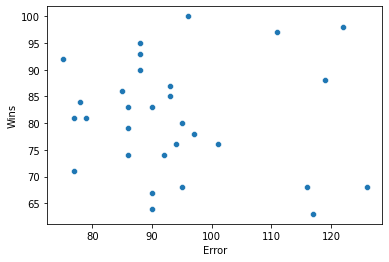

In [59]:
#Lets check impact of number of Errors on number of Wins
sns.scatterplot(x = 'Error', y = 'Wins', data = df)
plt.show()

above all scatterplot, most of them has uneven results with no much better relation

# Multivariate Analysis

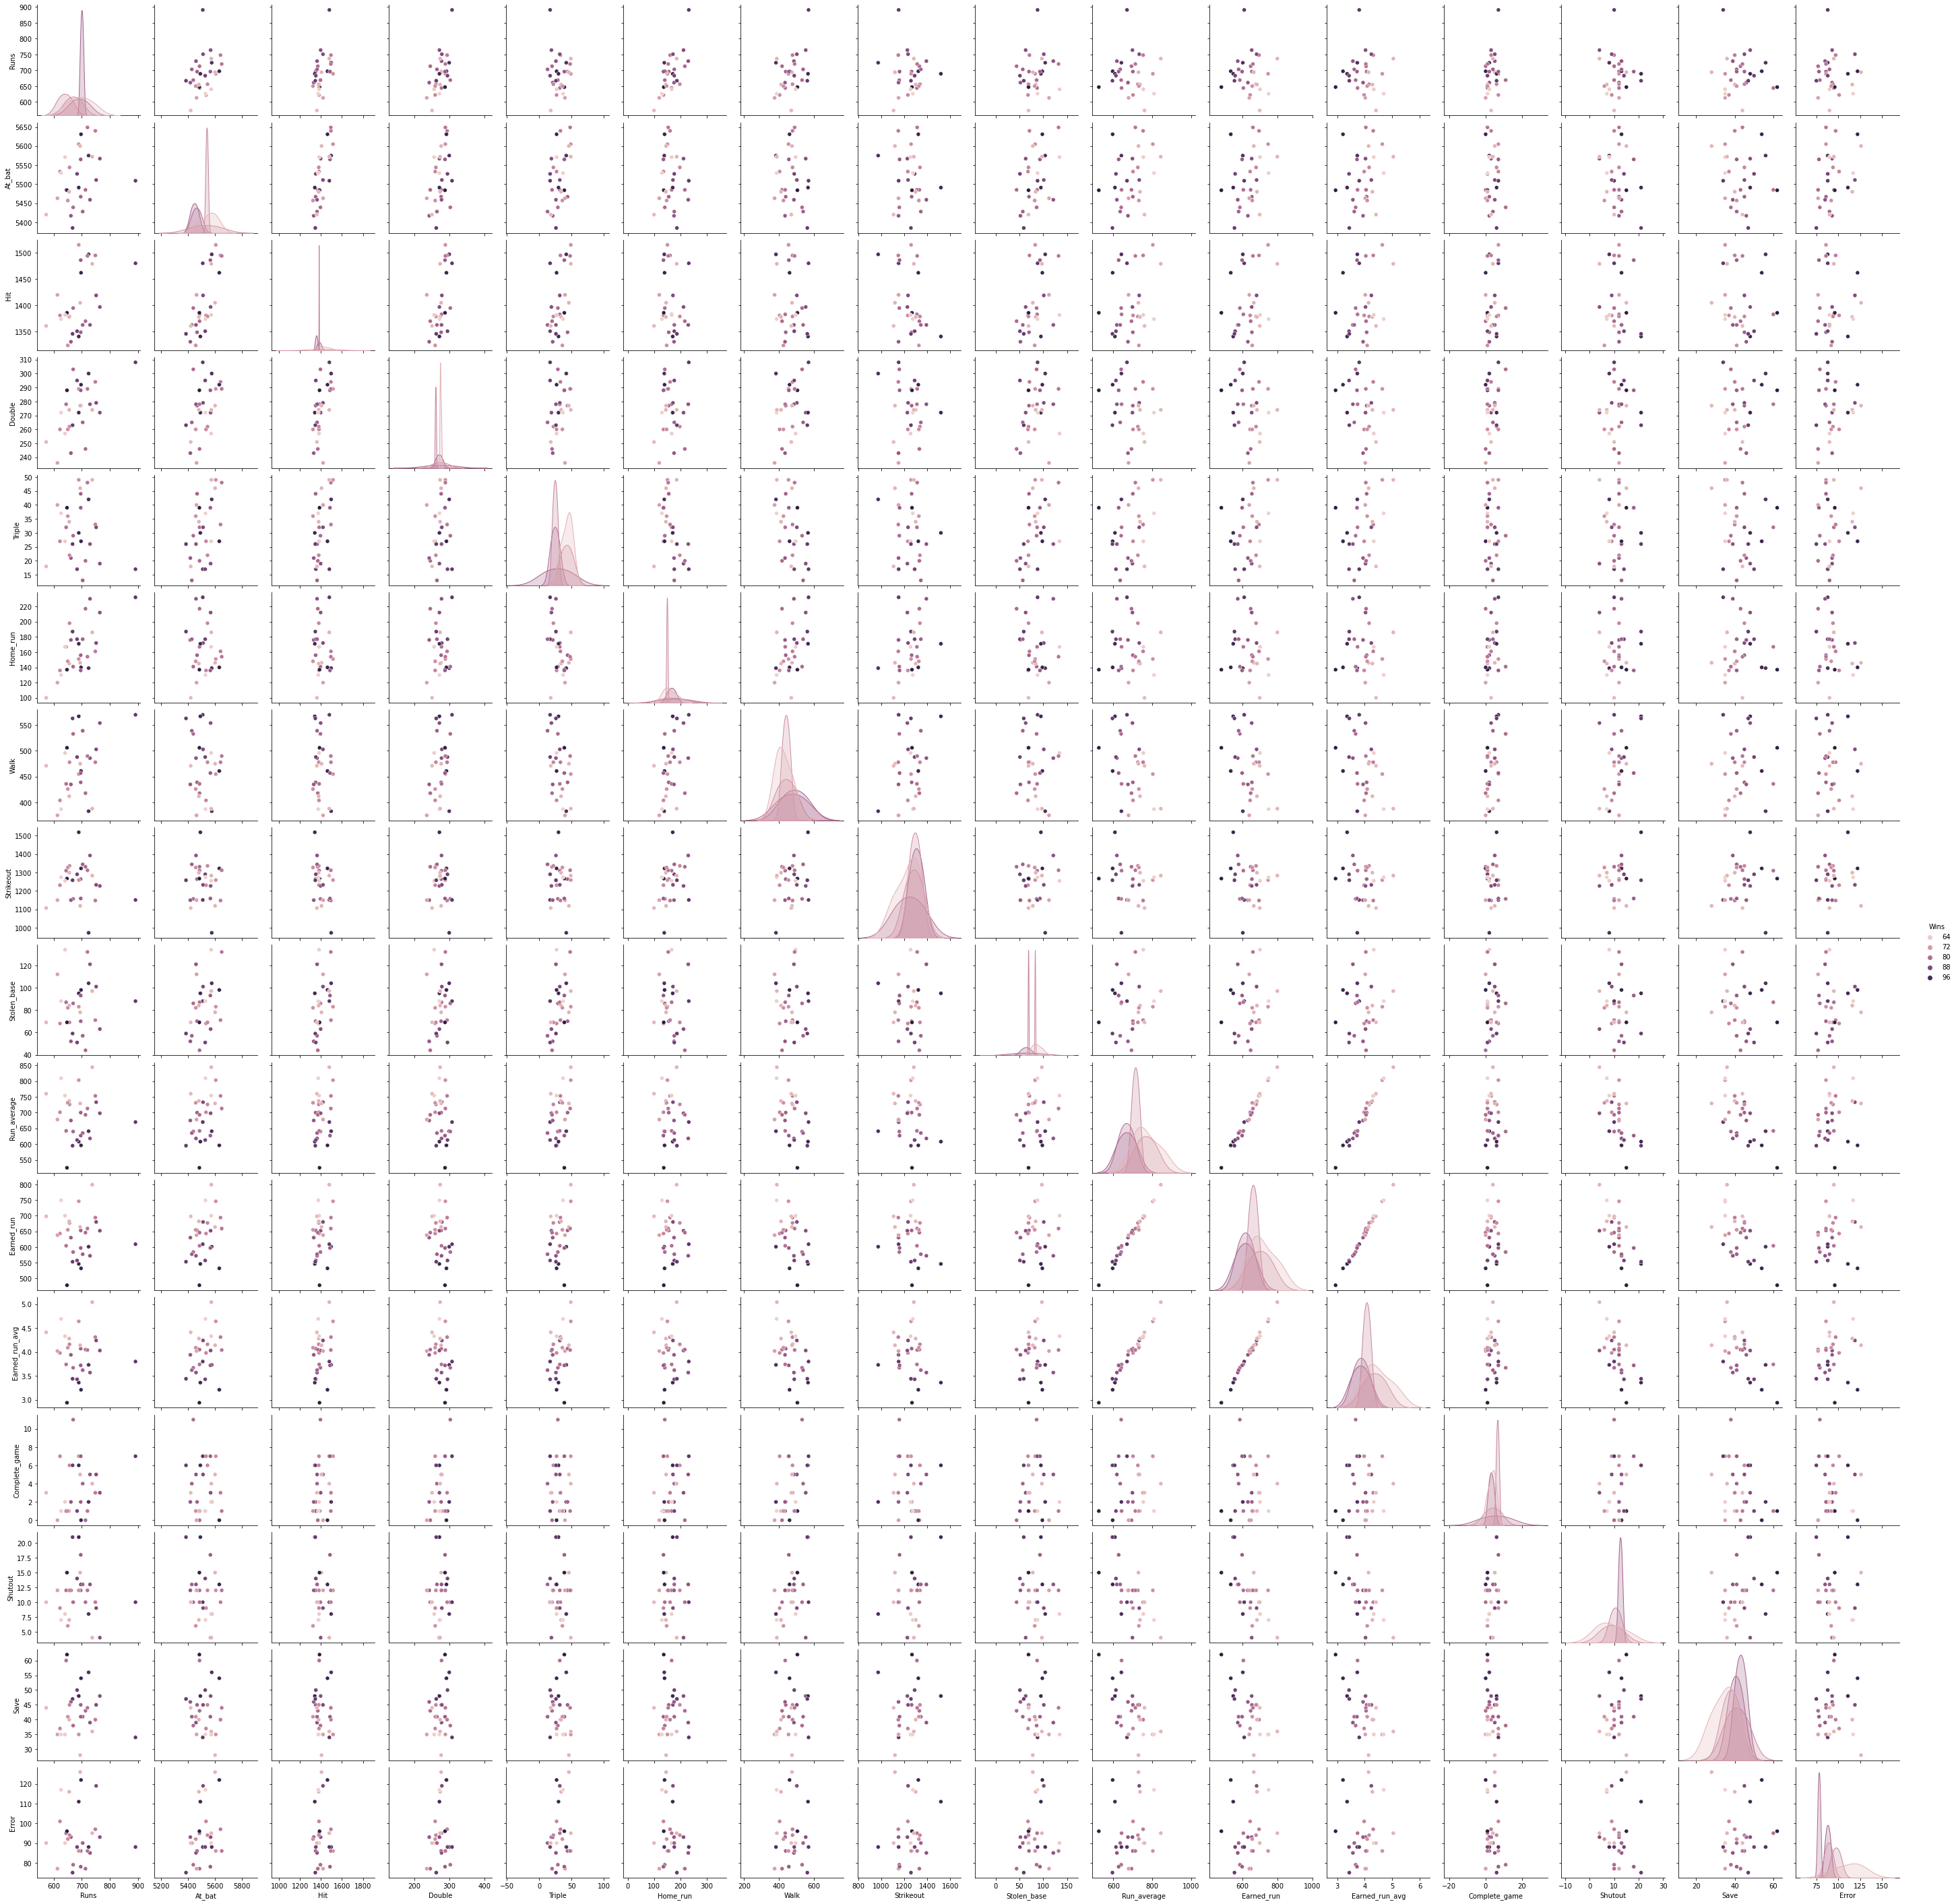

In [61]:
sns.pairplot(df, hue="Wins")

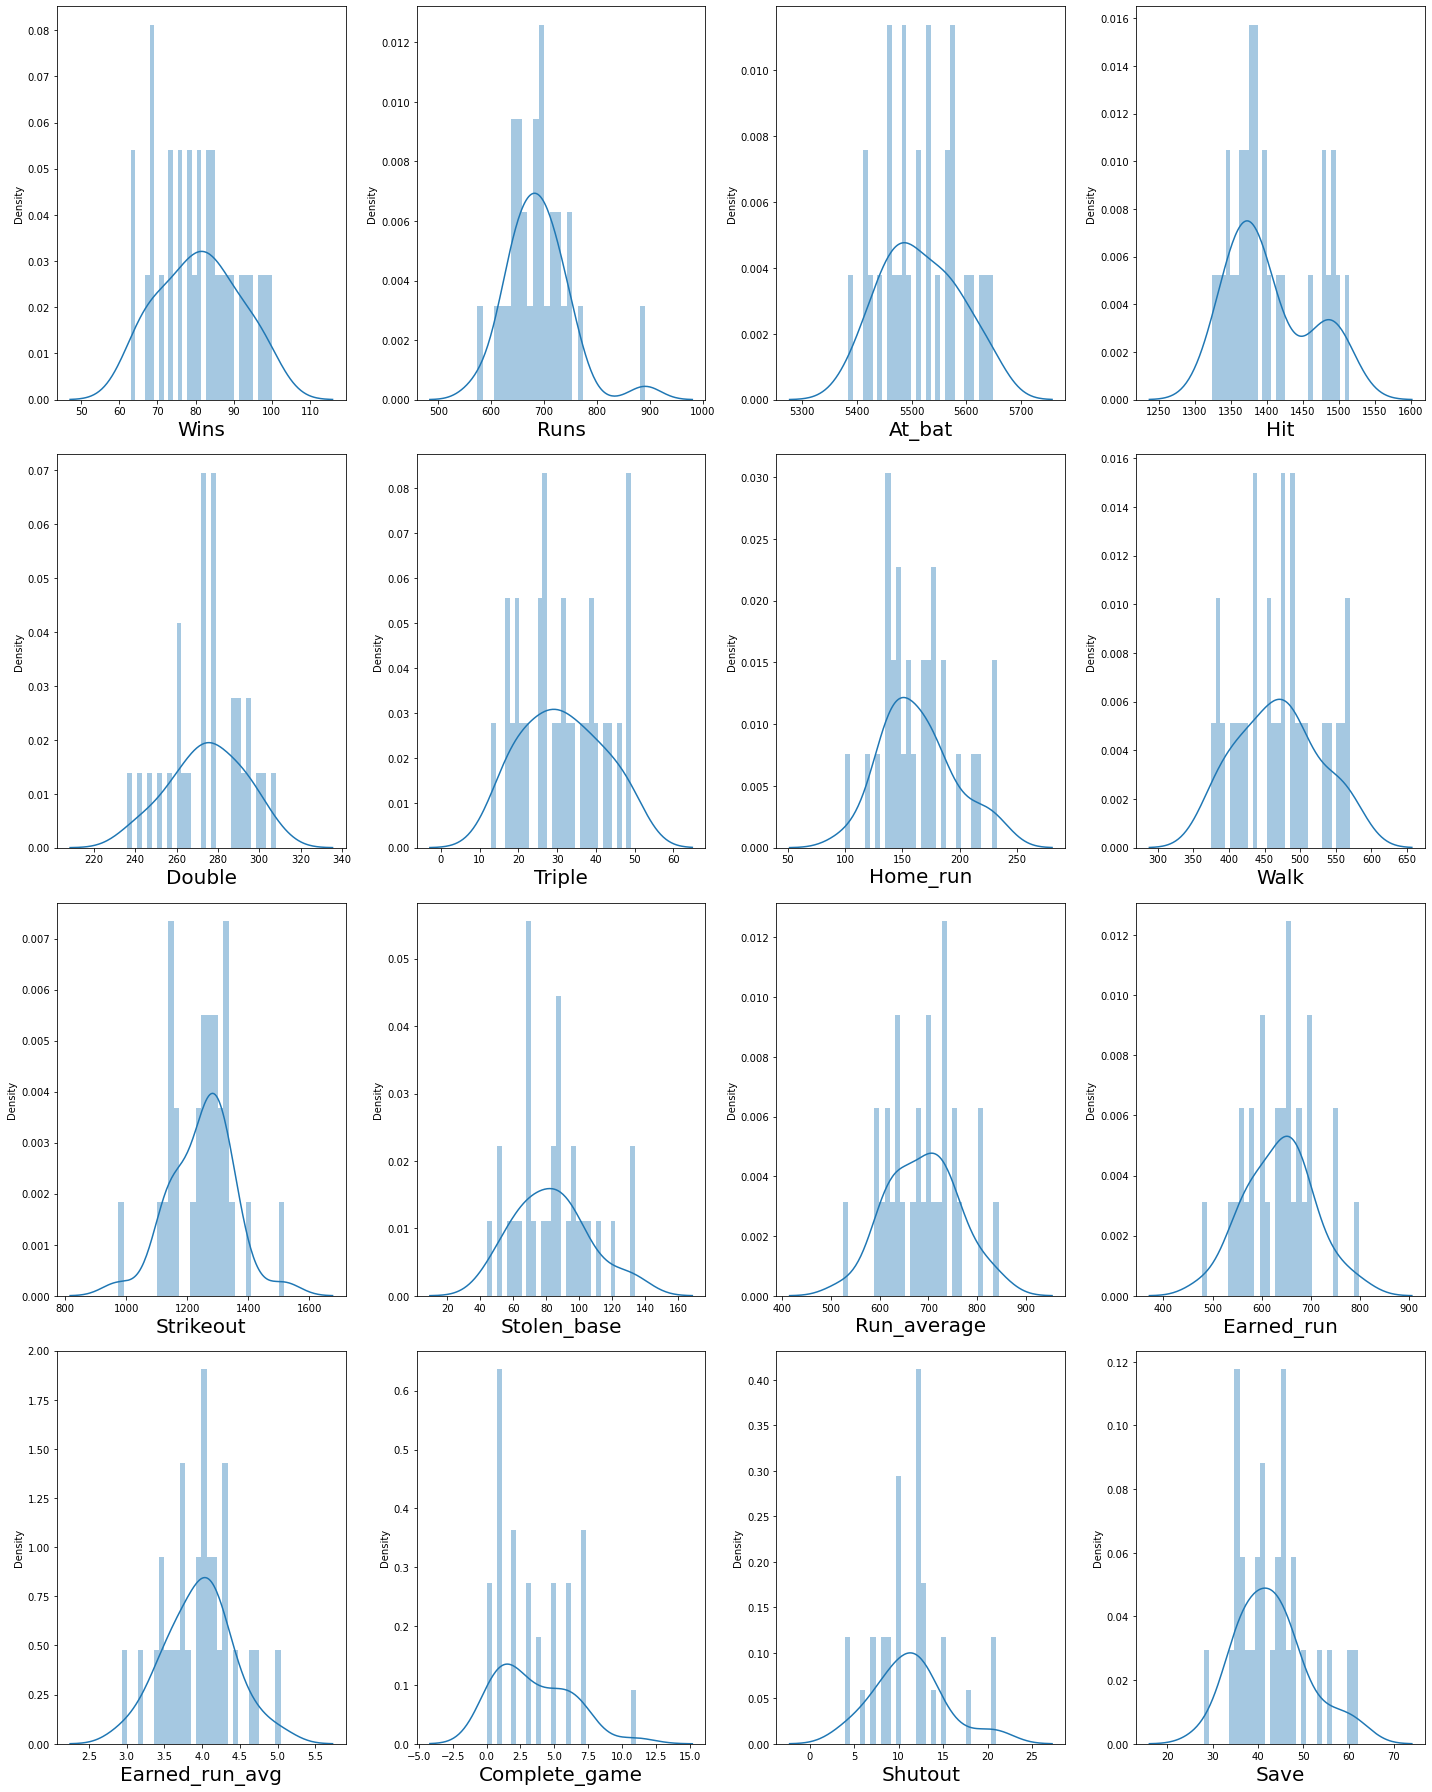

In [80]:
#Lets have a look on distribution of continuous parameters
plt.figure(figsize = (20,25))
index = 1
for i in df:
    if index <=16:
        ax = plt.subplot(4,4,index)
        sns.distplot(df[i], bins=30)
        plt.xlabel(i,fontsize = 20)
    index+=1
plt.tight_layout()

data is normally ditributed, there ain't much skewness in the columns.

data is small so we will avoid losing any data.

In [81]:
#check the skewness
df.skew()

Wins              0.047089
Runs              1.200786
At_bat            0.183437
Hit               0.670254
Double           -0.230650
Triple            0.129502
Home_run          0.516441
Walk              0.158498
Strikeout        -0.156065
Stolen_base       0.479893
Run_average       0.045734
Earned_run        0.058710
Earned_run_avg    0.053331
Complete_game     0.736845
Shutout           0.565790
Save              0.657524
Error             0.890132
dtype: float64

In [82]:
#lets seperat our data into label and features
X = df.drop(columns = "Wins", axis = 1)
Y = df["Wins"]

In [86]:
#Lets treat the skewed data
for index in X.skew().index:
    if X.skew().loc[index]>0.5:
        X[index]=np.log1p(X[index])
    if X.skew().loc[index]<-0.5:
        X[index]=np.square(X[index])

In [88]:
#check skewness again after treating
X.skew()

Runs              0.744813
At_bat            0.183437
Hit               0.628584
Double           -0.230650
Triple            0.129502
Home_run         -0.009528
Walk              0.158498
Strikeout        -0.156065
Stolen_base       0.479893
Run_average       0.045734
Earned_run        0.058710
Earned_run_avg    0.053331
Complete_game    -0.325962
Shutout          -0.093545
Save              0.163057
Error             0.632916
dtype: float64

In [89]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Runs,At_bat,Hit,Double,Triple,Home_run,Walk,Strikeout,Stolen_base,Run_average,Earned_run,Earned_run_avg,Complete_game,Shutout,Save,Error
0,0.665329,0.847731,1.649382,1.420173,1.041193,-0.763978,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.278921,-0.789565,1.581273,-0.427060
1,0.179562,-0.711094,-0.981656,0.127403,1.235809,-0.157077,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.278921,0.267953,0.336185,-0.591693
2,-0.307704,-1.115233,-0.134210,1.588795,-0.223808,-0.688861,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,1.762778,-0.232712,-0.622441,-1.199289
3,-1.204730,0.241522,-0.389136,-0.828122,-0.418423,-0.878690,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.165619,-0.503258,-0.773282,0.560495
4,0.055070,1.280738,1.951480,0.801892,1.722347,-0.328473,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.165619,0.267953,-1.087253,-0.591693
5,3.221983,-0.104884,1.360715,1.869832,-1.391501,1.933613,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.165619,-0.232712,-1.250843,-0.427060
6,1.327687,0.732263,-0.098001,-0.153633,-1.196885,1.458347,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,0.144769,-2.140778,0.703068,-0.031141
7,0.476767,-0.451289,-0.591253,-1.615025,-1.099578,1.581221,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.896930,-0.232712,0.078051,-1.382679
8,-0.776713,-0.451289,-0.352560,0.183611,0.068115,0.201536,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.876080,0.267953,1.975123,0.121359
9,1.066997,1.785913,1.615591,1.082929,0.165423,0.008945,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,0.144769,-0.232712,-0.332028,0.270716


# Best randomstate

In [95]:
#Lets find best random state using LinearRegression
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(4,1000):
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30,random_state = r_state)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.8784277602975863 on Random State 6


in random state selection process we have found the number to be 6 amongst 4-1000

In [97]:
#training and testing data sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=6)

In [98]:
#Regression 

def dre(mod, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    mod.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = mod.predict(X_test)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cvscore = (cross_val_score(mod, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cvscore)
    
     # RMSE
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("Root-mean-square deviation Score is:", rmse)
        
    # Result of r2 score minus cv score
    result = r2 - cvscore
    print("R2 Score - Cross Validation Score is", result)

In [100]:
#Linear Regression Model

mod=LinearRegression()
dre(mod, X, Y)

R2 Score is: -75.36767777666084
Cross Validation Score: -16.752638840055177
Root-mean-square deviation Score is: 14.78257647467149
R2 Score - Cross Validation Score is -58.615038936605664


In [114]:
#Ridge Regression

mod=Ridge()
dre(mod, X, Y)

R2 Score is: 54.33175510583681
Cross Validation Score: 45.38044155922741
Root-mean-square deviation Score is: 7.543667180893267
R2 Score - Cross Validation Score is 8.951313546609406


In [113]:
#Lasso Regression

mod=Lasso()
dre(mod, X, Y)

R2 Score is: 78.07049625504618
Cross Validation Score: 56.87419866914878
Root-mean-square deviation Score is: 5.2274484748477965
R2 Score - Cross Validation Score is 21.196297585897398


In [103]:
#Support Vector Regression

mod=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dre(mod, X, Y)

R2 Score is: -0.9513377719426952
Cross Validation Score: -13.509284021618187
Root-mean-square deviation Score is: 11.21582948567589
R2 Score - Cross Validation Score is 12.557946249675492


In [104]:
#Decision Tree Regressor

mod=DecisionTreeRegressor(criterion="poisson", random_state=111)
dre(mod, X, Y)

R2 Score is: -3.523510971786825
Cross Validation Score: -81.208749514949
Root-mean-square deviation Score is: 11.357816691600547
R2 Score - Cross Validation Score is 77.68523854316219


In [110]:
#KNeighbors Regressor

mod=KNeighborsRegressor()
dre(mod, X, Y)

R2 Score is: 53.089404388714755
Cross Validation Score: -22.170742118394124
Root-mean-square deviation Score is: 7.645586962424793
R2 Score - Cross Validation Score is 75.26014650710889


In [112]:
#AdaBoost Regressor

mod=AdaBoostRegressor()
dre(mod, X, Y)

R2 Score is: 69.77777777777777
Cross Validation Score: -103.00684769749083
Root-mean-square deviation Score is: 6.136751764754887
R2 Score - Cross Validation Score is 172.7846254752686


In [111]:
#Extra Trees Regressor

mod=ExtraTreesRegressor()
dre(mod, X, Y)

R2 Score is: 69.31871097178681
Cross Validation Score: -80.404821008907
Root-mean-square deviation Score is: 6.183183848148139
R2 Score - Cross Validation Score is 149.72353198069382


In [109]:
#XGB Regressor

mod=XGBRegressor()
dre(mod, X, Y)

R2 Score is: 52.98872431554484
Cross Validation Score: -118.78740615583992
Root-mean-square deviation Score is: 7.653787089403947
R2 Score - Cross Validation Score is 171.77613047138476


# Hyper parameter tuning

In [115]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

In [116]:
GCV =  GridSearchCV(estimator = Ridge(), cv = 5, param_grid=dict(alpha=alphas))
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})

In [117]:
GCV.best_params_

{'alpha': 1.0}

In [120]:
#Lets check the final model accuracy
model = Ridge(alpha = 1.0, normalize = True)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

# evaluation
print("r2 score :", r2_score(y_test,y_pred))
print('--------------------------------------------')

r2 score : 0.719656110616104
--------------------------------------------


i have perfectly got the accuracy as expected. It's 71% which is not too shabby.

# Saving the Model

In [123]:
import joblib
joblib.dump(model,'baseball.pkl')

['baseball.pkl']